## week08: Model free
### Q-learning 
_Reference: based on Practical RL_ [week03](https://github.com/yandexdataschool/Practical_RL/tree/master/week03_model_free)

This notebook will guide you through implementation of vanilla Q-learning algorithm.

You need to implement QLearningAgent (follow instructions for each method) and use it on a number of tests below.

In [1]:
# In google collab, uncomment this:
# !wget https://bit.ly/2FMJP5K -q -O setup.py
# !bash setup.py 2>&1 1>stdout.log | tee stderr.log

# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

bash: ../xvfb: No such file or directory


In [35]:
%%writefile qlearning.py
from collections import defaultdict
import random
import math
import numpy as np


class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on https://inst.eecs.berkeley.edu/~cs188/sp19/projects.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value
        !!!Important!!!
        Note: please avoid using self._qValues directly. 
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

    #---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        #<YOUR CODE HERE >
        
        value = max([
            self.get_qvalue(state,action) for action in possible_actions
        ])

        return value

    def update(self, state, action, reward, next_state):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        Note:
            First part: (1 - alpha) * Q(s,a) - saves info gained on previous steps
            alpha * (r + gamma * V(s')) - adds new information 
        """

        # agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        #<YOUR CODE HERE >
        Q_hat = reward + gamma * self.get_value(next_state)
        Q_new = (1 - learning_rate) * self.get_qvalue(state, action) + learning_rate * Q_hat

        self.set_qvalue(state, action, Q_new)

    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        #<YOUR CODE HERE >
        # from all possibla actions choose one which maximize Q-function 
        best_action = max(
            possible_actions,
            key = lambda action: self.get_qvalue(state, action)
        )

        return best_action

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.get_best_action).

        Note: 
            Epsilon need to be bigger at the begining to explore environment, 
            then it can decreases as we lern something and want to use "best actions".
            We can use Softmax instead of epsilon-gready. Picking action probabilities
            as softmax(Q(s,a)/ tau)= pi(a|s), where tau is temperature.
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        action = None

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        # agent parameters:
        epsilon = self.epsilon

        #<YOUR CODE HERE >
        coin = random.random()
        if coin < epsilon:
            chosen_action = random.choice(possible_actions)
        else:
            chosen_action = self.get_best_action(state)

        return chosen_action

Overwriting qlearning.py


### Try it on taxi

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [40]:
import gym
env = gym.make("Taxi-v3")

n_actions = env.action_space.n

In [41]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions=lambda s: range(n_actions))

In [42]:
def play_and_train(env, agent, t_max=10**4):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0 
    s = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)
        
        next_s, r, done, _ = env.step(a)

        # train (update) agent for state s
        #<YOUR CODE HERE >
        agent.update(s, a, r, next_s)

        s = next_s
        total_reward += r
        if done:
            break

    return total_reward

eps = 2.9191091959171894e-05 mean reward = 7.5


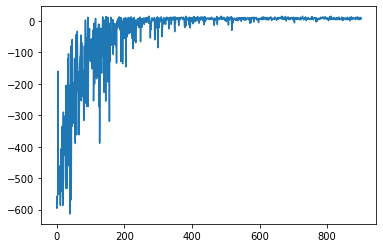

In [43]:
from IPython.display import clear_output

rewards = []
for i in range(1000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99

    if i % 100 == 0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()

# Binarized state spaces

Use agent to train efficiently on CartPole-v0.
This environment has a continuous set of possible states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

/Users/artem/Documents/ML_projets/venvs/work_env/lib/python3.8/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/Users/artem/Documents/ML_projets/venvs/work_env/lib/python3.8/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


first state:[-0.03806737  0.00832714 -0.04797133 -0.0261242 ]


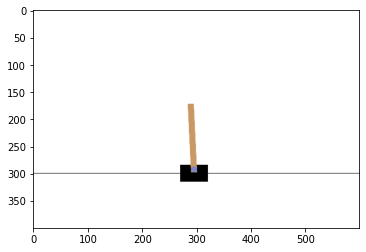

In [44]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s" % (env.reset()))
plt.imshow(env.render('rgb_array'))

### Play a few games

We need to estimate observation distributions. To do so, we'll play a few games and record all states.

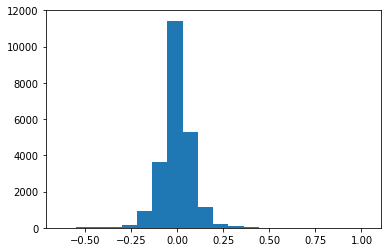

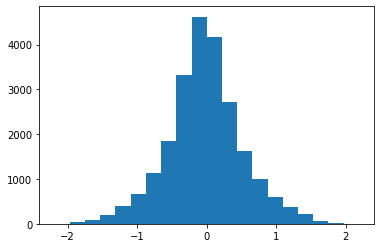

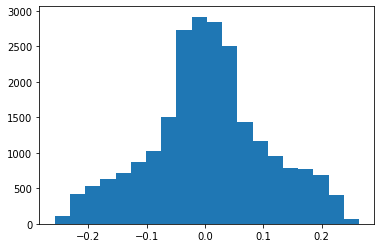

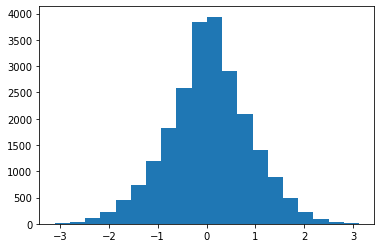

In [45]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

## Binarize environment

In [46]:
t = env.reset()
print(t)
del t

[ 0.04025831  0.04999072 -0.01516946  0.00034917]


In [72]:
from gym.core import ObservationWrapper


class Binarizer(ObservationWrapper):

    def observation(self, state):
        
        # state = <round state to some amount digits.>
        # hint: you can do that with round(x,n_digits)
        # you will need to pick a different n_digits for each dimension
        
        n_digits = [1, 1, 1, 1]
        
        state = [round(x, n) for x,n in zip(state, n_digits)]
        
        return tuple(state)

In [73]:
env = Binarizer(gym.make("CartPole-v0"))

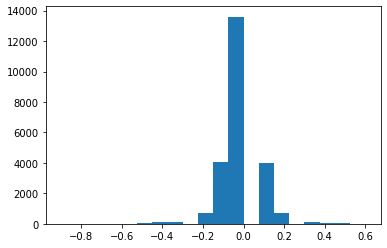

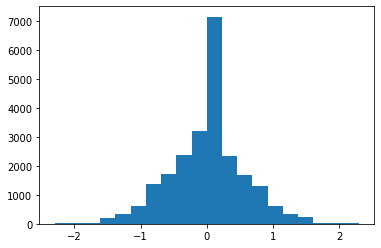

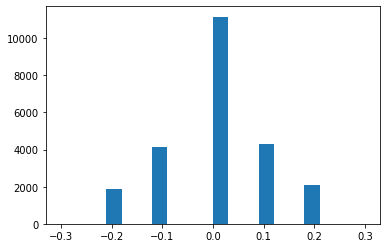

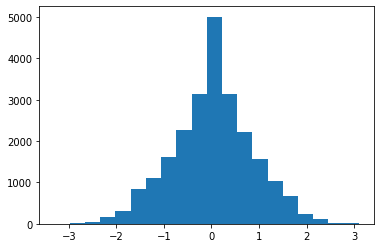

In [74]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

## Learn binarized policy

Now let's train a policy that uses binarized state space.

__Tips:__ 
* If your binarization is too coarse, your agent may fail to find optimal policy. In that case, change binarization. 
* If your binarization is too fine-grained, your agent will take much longer than 1000 steps to converge. You can either increase number of iterations and decrease epsilon decay or change binarization.
* Having 10^3 ~ 10^4 distinct states is recommended (`len(QLearningAgent._qvalues)`), but not required.
* A reasonable agent should get to an average reward of >=50.

In [97]:
agent = QLearningAgent(alpha=0.5, epsilon=0.1, discount=0.99,
                       get_legal_actions=lambda s: range(n_actions))

eps = 7.034193504641336e-15 mean reward = 97.7


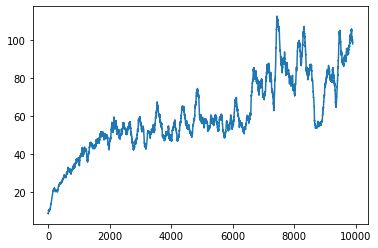

In [98]:
rewards = []
mean_rewards = []
for i in range(10000):
    
    if i == 1000:
        agent.epsilon *= 0.5
    if (i+1) % 4000 == 0: 
        agent.epsilon *= 0.8
    if i > 7000: 
        agent.epsilon *= 0.99
    if np.mean(rewards[:-10]) > 150:
        agent.epsilon *= 0.6 
    if np.mean(rewards[:-10]) > 190:
        agent.epsilon *= 0.2
        
    rewards.append(play_and_train(env, agent))
    mean_rewards.append(np.mean(np.mean(rewards[-100:])))
    # OPTIONAL YOUR CODE: adjust epsilon
    if i % 100 == 0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(mean_rewards)
        plt.show()